In [1]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.neighbors import LocalOutlierFactor
from scipy.stats import probplot
from scipy.stats import zscore

In [25]:
df=pd.read_csv("river-historical-1986_2020-en.csv")
#Selectionner seulement les 1900 examples premiers car les autres exemples incorect 
#en plus contient beaucoup des donneés aberantes

<ipython-input-25-23cb3accfdb5>:1: DtypeWarning: Columns (50) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv("river-historical-1986_2020-en.csv")


In [26]:
# Checking for datatypes of the dataset
df.dtypes

Water Control Zone                             object
River                                          object
Station                                        object
Dates                                          object
Sample No                                       int64
5-Day Biochemical Oxygen Demand (mg/L)         object
Aluminium (μg/L)                               object
Ammonia-Nitrogen (mg/L)                        object
Anionic Surfactants (as Manoxol OT) (mg/L)     object
Antimony (μg/L)                                object
Arsenic (μg/L)                                 object
Barium (μg/L)                                  object
Beryllium (μg/L)                               object
Boron (μg/L)                                   object
Cadmium (μg/L)                                 object
Chemical Oxygen Demand (mg/L)                  object
Chloride (mg/L)                                object
Chlorophyll-a (μg/L)                           object
Chromium (μg/L)             

In [27]:
df.shape

(31865, 56)

In [32]:
new_df=df[['Water Control Zone','River','Station','Dates','5-Day Biochemical Oxygen Demand (mg/L)','Conductivity (μS/cm)','Total Phosphorus (mg/L)',
           'Dissolved Oxygen (mg/L)','Faecal Coliforms (counts/100mL)',
           'Nitrate-Nitrogen (mg/L)','pH','Turbidity (NTU)','Water Temperature (°C)']]

In [33]:
new_df.head(5)

,Water Control Zone,River,Station,Dates,5-Day Biochemical Oxygen Demand (mg/L),Conductivity (μS/cm),Total Phosphorus (mg/L),Dissolved Oxygen (mg/L),Faecal Coliforms (counts/100mL),Nitrate-Nitrogen (mg/L),pH,Turbidity (NTU),Water Temperature (°C)
0,Junk Bay,Tseng Lan Shue Stream,JR11,4/29/1986,9.7,320.0,2.5,6.0,NaN,3.4,6.9,4.1,25.0
1,Junk Bay,Tseng Lan Shue Stream,JR11,5/19/1986,5.6,220.0,2,5.3,NaN,2.6,7.1,4.2,26.6
2,Junk Bay,Tseng Lan Shue Stream,JR11,6/18/1986,9,220.0,1.9,6.2,NaN,1.6,7.2,5.5,28.4
3,Junk Bay,Tseng Lan Shue Stream,JR11,7/24/1986,12.2,185.0,2.1,5.2,NaN,1.3,7.3,6.5,26.5
4,Junk Bay,Tseng Lan Shue Stream,JR11,8/15/1986,8.8,250.0,4.5,5.1,NaN,2.2,7.3,6.7,30.1


In [34]:
new_df.dtypes

Water Control Zone                         object
River                                      object
Station                                    object
Dates                                      object
5-Day Biochemical Oxygen Demand (mg/L)     object
Conductivity (μS/cm)                      float64
Total Phosphorus (mg/L)                    object
Dissolved Oxygen (mg/L)                   float64
Faecal Coliforms (counts/100mL)            object
Nitrate-Nitrogen (mg/L)                    object
pH                                        float64
Turbidity (NTU)                           float64
Water Temperature (°C)                    float64
dtype: object

In [35]:
#renommer les variables par des target plus simplement à utiliser que les anciennes 
new_df = new_df.rename(columns={'Dissolved Oxygen (mg/L)': 'DO'})
new_df= new_df.rename(columns={'Conductivity (μS/cm)': 'CONDUCTIVITY'})
new_df= new_df.rename(columns={'5-Day Biochemical Oxygen Demand (mg/L)': 'BOD'})
new_df= new_df.rename(columns={'Nitrate-Nitrogen (mg/L)': 'NITRATE'})
new_df= new_df.rename(columns={'Faecal Coliforms (counts/100mL)': 'FECAL_COLIFORM'})
new_df= new_df.rename(columns={'Water Temperature (°C)': 'TEMP'})
new_df= new_df.rename(columns={'Turbidity (NTU)': 'TURBIDITY'})
new_df= new_df.rename(columns={'Total Phosphorus (mg/L)': 'TOTAL_PHOSPHORUS'})
new_df= new_df.rename(columns={'Water Control Zone': 'ZONE'})
new_df= new_df.rename(columns={'pH': 'PH'})
new_df.head(5)

,ZONE,River,Station,Dates,BOD,CONDUCTIVITY,TOTAL_PHOSPHORUS,DO,FECAL_COLIFORM,NITRATE,PH,TURBIDITY,TEMP
0,Junk Bay,Tseng Lan Shue Stream,JR11,4/29/1986,9.7,320.0,2.5,6.0,NaN,3.4,6.9,4.1,25.0
1,Junk Bay,Tseng Lan Shue Stream,JR11,5/19/1986,5.6,220.0,2,5.3,NaN,2.6,7.1,4.2,26.6
2,Junk Bay,Tseng Lan Shue Stream,JR11,6/18/1986,9,220.0,1.9,6.2,NaN,1.6,7.2,5.5,28.4
3,Junk Bay,Tseng Lan Shue Stream,JR11,7/24/1986,12.2,185.0,2.1,5.2,NaN,1.3,7.3,6.5,26.5
4,Junk Bay,Tseng Lan Shue Stream,JR11,8/15/1986,8.8,250.0,4.5,5.1,NaN,2.2,7.3,6.7,30.1


In [36]:
#convertir le types des donneés d'un certains variables en float
new_df['TOTAL_PHOSPHORUS']=pd.to_numeric(new_df['TOTAL_PHOSPHORUS'], errors='coerce')
new_df['FECAL_COLIFORM']=pd.to_numeric(new_df['FECAL_COLIFORM'], errors='coerce')
new_df['NITRATE']=pd.to_numeric(new_df['NITRATE'], errors='coerce')
new_df['BOD']=pd.to_numeric(new_df['BOD'], errors='coerce')

In [37]:
new_df.dtypes

ZONE                 object
River                object
Station              object
Dates                object
BOD                 float64
CONDUCTIVITY        float64
TOTAL_PHOSPHORUS    float64
DO                  float64
FECAL_COLIFORM      float64
NITRATE             float64
PH                  float64
TURBIDITY           float64
TEMP                float64
dtype: object

In [38]:
# Remplacer la chaine de caractere NAN valeur par la valeur NAN (np.nan)
def convert_to_nan(df):
    #récupère le nombre de colonnes dans df en utilisant l'attribut shape de l'objet DataFrame
    #qui renvoie un tuple contenant le nombre de lignes et de colonnes
    n_col = df.shape[1] 
    #on parcourt chaque colonne du DataFrame df à l'aide de la boucle for et index
    for index in range(n_col):
        #La ligne df.iloc[:, index] permet d'accéder à toutes les lignes de la colonne correspondante.
        #La méthode replace() est ensuite appliquée à la colonne pour remplacer chaque occurrence 
        #de la chaîne de caractères "NAN" par la valeur NaN de la bibliothèque Numpy. 
        df.iloc[:, index]  = df.iloc[:, index].replace("NAN", np.nan)
    return df

new_df = convert_to_nan(new_df)

In [39]:
df.shape

(31865, 56)

<Axes: title={'center': 'Missing Values Per Feature'}>

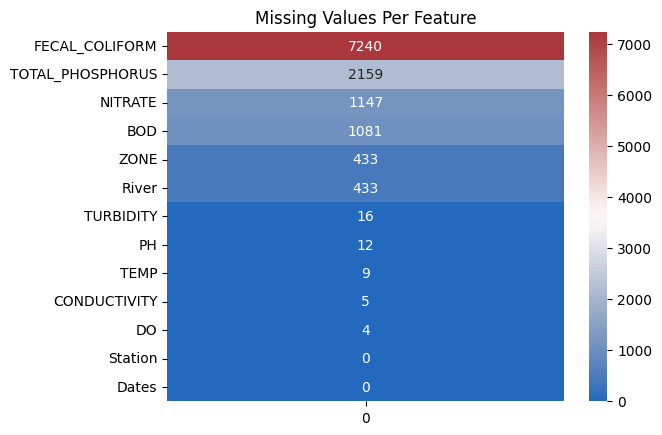

In [40]:
plt.title('Missing Values Per Feature')
nans = new_df.isna().sum().sort_values(ascending=False).to_frame()
sns.heatmap(nans,annot=True,fmt='d',cmap='vlag')

In [55]:
# Remplacer les cases vides dans les colonnes ZONE et River en utilisant la valeur de la colonne Station
new_df['ZONE'] = new_df.apply(lambda x: x['Station'] if pd.isna(x['ZONE']) else x['ZONE'], axis=1)
new_df['River'] = new_df.apply(lambda x: x['Station'] if pd.isna(x['River']) else x['River'], axis=1)

In [59]:
new_df.dtypes

ZONE                 object
River                object
Station              object
Dates                object
BOD                 float64
CONDUCTIVITY        float64
TOTAL_PHOSPHORUS    float64
DO                  float64
FECAL_COLIFORM      float64
NITRATE             float64
PH                  float64
TURBIDITY           float64
TEMP                float64
dtype: object

In [64]:
# remplacer les valeurs manquantes de chaque colonne par la moyenne de cette colonne pour toutes les lignes qui ont le même état
df_clean = new_df.fillna(new_df.groupby('Station').transform('mean'))

<ipython-input-64-a04e56af0631>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_clean = new_df.fillna(new_df.groupby('Station').transform('mean'))


In [65]:
df_clean.shape

(31865, 13)

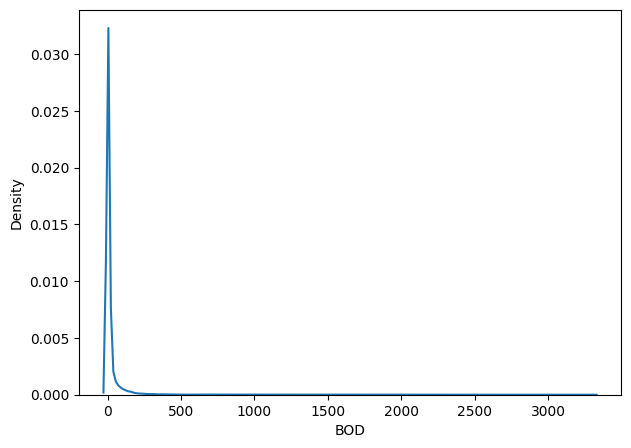

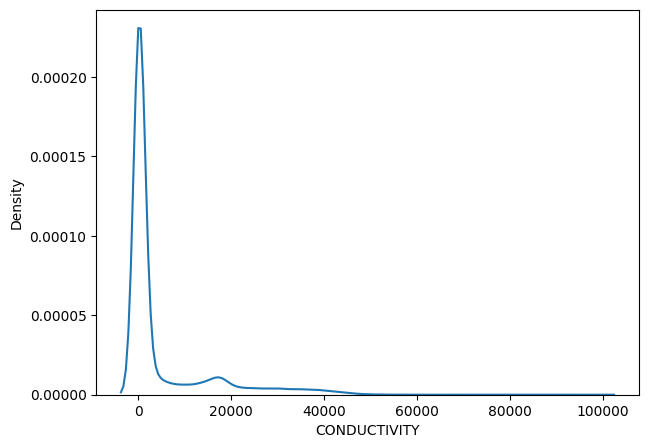

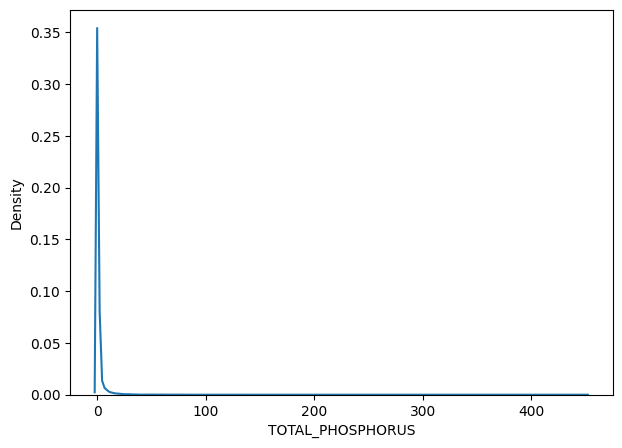

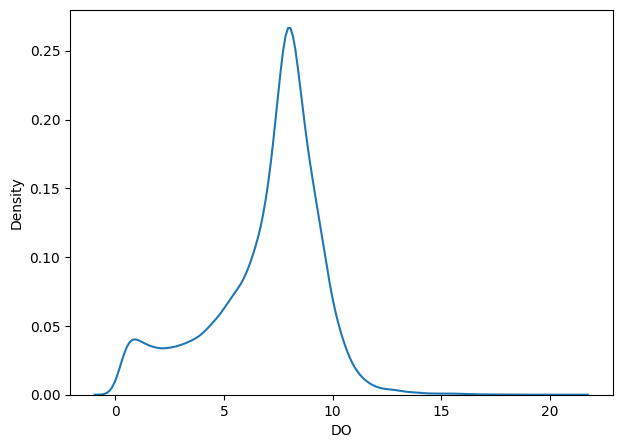

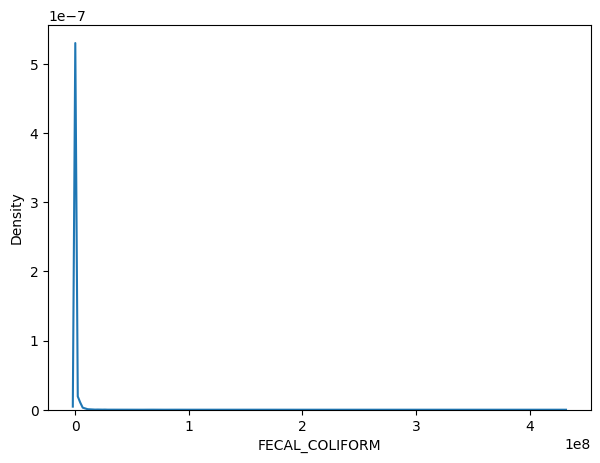

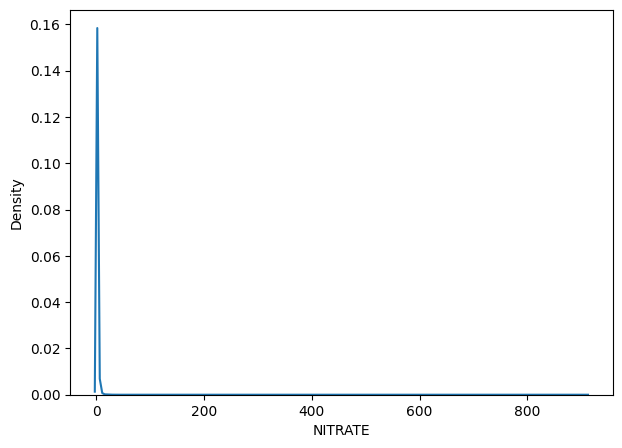

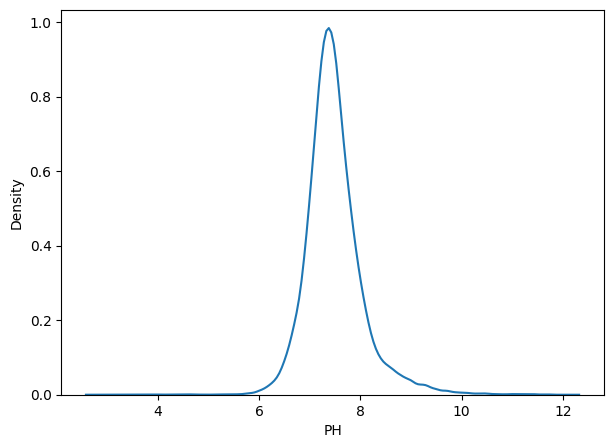

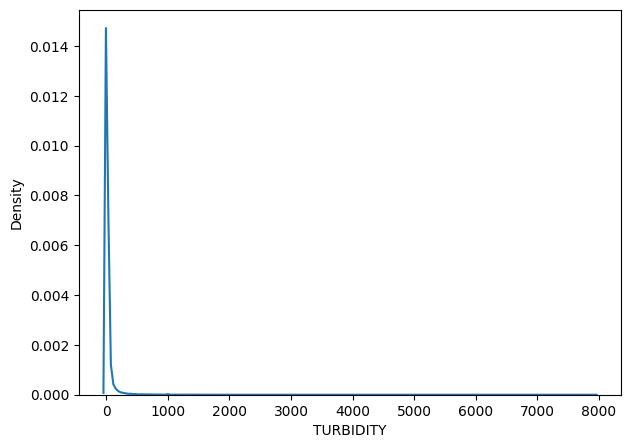

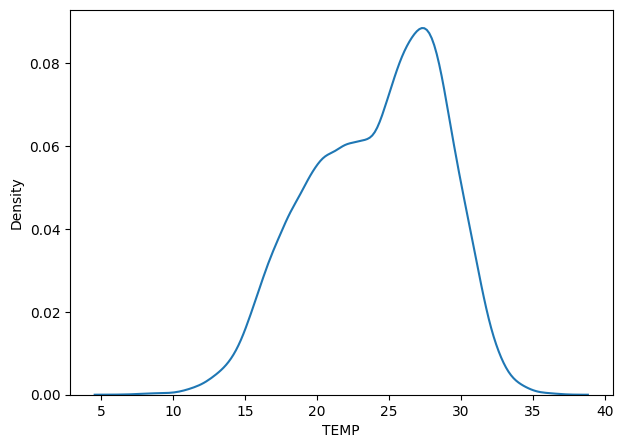

In [68]:
#Tracer PDFs de tous les attributs numériques de l’ensemble de données

df_num_final = df_clean.select_dtypes(exclude="object")

def plot_kde(df):
    n_col = df.shape[1]
    for index in range(n_col):
        col_index = df.iloc[:, index]
        fig, ax = plt.subplots(1,1, figsize=(7, 5))
        sns.kdeplot(data=df, x=col_index.name)
        
plot_kde(df_num_final)

In [69]:
# Ici, presque tous les plots kde sont gaussiens 
# Utilisation de la normalisation Z-Score pour détecter les valeurs aberrantes

df_num_final_norm = df_num_final.apply(zscore, axis=0)

def indices_of_greater_than_3(df_norm):
    indices_arr = []
    n_col = df_norm.shape[1]
    for index in range(n_col):
        col_index = df_norm.iloc[:, index]
        greater_than_3 = col_index[col_index > 3]
        greater_than_3_index = greater_than_3.index
        indices_arr.extend(greater_than_3_index)
    return indices_arr

indices_arr = indices_of_greater_than_3(df_num_final_norm)
print("Number of outliers using Z-Score method: ", len(indices_arr))
df_clean.iloc[indices_arr, :]

Number of outliers using Z-Score method:  2669


,ZONE,River,Station,Dates,BOD,CONDUCTIVITY,TOTAL_PHOSPHORUS,DO,FECAL_COLIFORM,NITRATE,PH,TURBIDITY,TEMP
14,Junk Bay,Tseng Lan Shue Stream,JR3,9/15/1986,405.5,250.0,4.50,1.7,2.072521e+05,1.141053,6.1,150.0,25.5
16,Junk Bay,Tseng Lan Shue Stream,JR3,11/10/1986,464.0,620.0,15.00,2.1,2.072521e+05,0.056000,6.7,43.0,18.1
17,Junk Bay,Tseng Lan Shue Stream,JR3,12/17/1986,288.5,600.0,13.00,2.4,2.072521e+05,1.141053,6.6,55.0,17.9
18,Junk Bay,Tseng Lan Shue Stream,JR6,4/29/1986,324.5,950.0,25.00,1.2,2.516800e+05,2.172782,7.2,142.0,25.1
39,Deep Bay,Kam Tin River,KT2,1/17/1986,295.5,1520.0,36.00,0.6,8.864502e+05,0.018000,7.1,200.0,21.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
29293,Deep Bay,Pak Nai Stream,DB3,6/25/2018,2.8,33.0,0.24,7.6,6.100000e+04,0.360000,5.5,934.0,27.3
29305,Deep Bay,Sheung Pak Nai Stream,DB5,6/25/2018,0.9,39.0,0.05,7.7,4.100000e+04,0.230000,6.0,467.2,27.6
29329,Deep Bay,Tsang Kok Stream,DB8,6/25/2018,2.6,165.0,0.10,7.6,3.900000e+04,0.430000,7.9,511.5,27.5
29332,Deep Bay,Tsang Kok Stream,DB8,9/24/2018,25.0,784.0,0.64,7.9,2.600000e+04,1.900000,8.3,663.4,25.6


In [70]:
df_clean.drop(indices_arr, axis=0, inplace=True)
df_clean.shape

(29575, 13)

In [72]:
df_clean=df_clean.dropna()

<Axes: title={'center': 'Missing Values Per Feature'}>

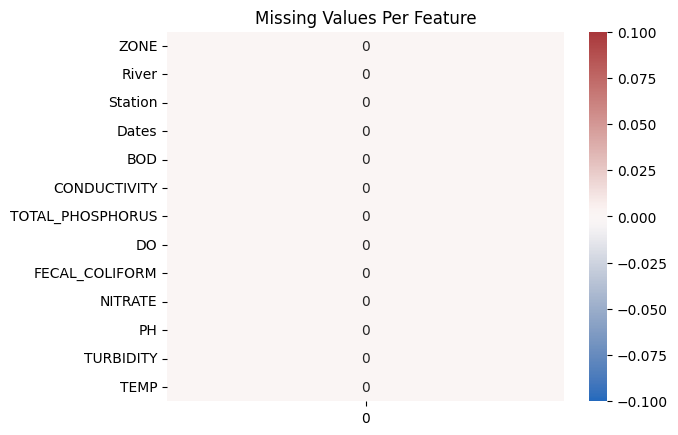

In [73]:
plt.title('Missing Values Per Feature')
nans = df_clean.isna().sum().sort_values(ascending=False).to_frame()
sns.heatmap(nans,annot=True,fmt='d',cmap='vlag')

In [92]:
# Calculating Water Quality Index of each sample
df_num_final = df_clean.select_dtypes(exclude="object")
# Dropping year and Temp attribute because they are not used for computing WQI
df_num_final.drop(["TURBIDITY","TEMP"], axis=1, inplace=True)
# Normaliser les valeurs de chaque paramètre
vIdeal = np.array([0,0,0,14.6,0,0,7])   # Valeurs idéales pour chaque paramètre
si = np.array([5,1000,0.1,10,100,45, 8.5])  # Limites permises pour chaque paramètre
wi=np.array([0.01913716405990558,9.568582029952789e-05,0.9568582029952789,0.00956858202995279,0.0009568582029952789,0.002126351562211731,0.011257155329356222])

def calc_wqi(sample): 
    wqi_sample = 0
    num_col = 7
    for index in range(num_col):
        v_index = sample[index] # Obeserved value of sample at index
        v_index_ideal = vIdeal[index] # Ideal value of obeserved value
        w_index = wi[index] # weight of corresponding parameter of obeserved value
        std_index = si[index] # Standard value recommended for obeserved value
        q_index = (v_index - v_index_ideal) / (std_index - v_index_ideal)
        q_index = q_index * 100 # Final qi value of obeserved value
        wqi_sample += q_index*w_index
    return wqi_sample



In [93]:
# Computing WQI for the whole dataset
def calc_wqi_for_df(df):
    wqi_arr = []
    for index in range(df.shape[0]):
        index_row = df.iloc[index, :]
        wqi_row = calc_wqi(index_row)
        wqi_arr.append(wqi_row)
    return wqi_arr

In [94]:
wqi_arr = calc_wqi_for_df(df_num_final)
# Converting oridnary array to numpy array
wqi_arr = np.array(wqi_arr)
wqi_arr = np.reshape(wqi_arr, (-1, 1))

# Resetting index values of the dataframes
wqi_arr_df = pd.DataFrame(wqi_arr, columns=["WQI"]).reset_index()
df_clean = df_clean.reset_index()

In [95]:
# Combining dataframe of WQI and dataframe of attributes 
df_wqi = pd.concat([df_clean, pd.DataFrame(wqi_arr, columns=["WQI"])], axis=1)
df_wqi.drop("index", axis=1, inplace=True)
df_wqi.shape

(29358, 14)

In [96]:
# These are samples with negative WQI
df_wqi[(df_wqi["WQI"] < 0)]

,ZONE,River,Station,Dates,BOD,CONDUCTIVITY,TOTAL_PHOSPHORUS,DO,FECAL_COLIFORM,NITRATE,PH,TURBIDITY,TEMP,WQI


In [97]:
# Removing the samples with negative WQI
df_neg_indices = df_wqi[(df_wqi["WQI"] < 0)].index
df_wqi.drop(df_neg_indices, axis=0, inplace=True)

In [98]:
df_wqi["WQI clf"] = df_wqi["WQI"].apply(lambda x: (4 if (0 <=x <= 25)
                                        else(3 if (26<=x<=50)
                                        else(2 if (51<=x<=75)
                                        else(1 if (76<=x<=100)
                                        else 0)))))

In [99]:
df_wqi.tail()

,ZONE,River,Station,Dates,BOD,CONDUCTIVITY,TOTAL_PHOSPHORUS,DO,FECAL_COLIFORM,NITRATE,PH,TURBIDITY,TEMP,WQI,WQI clf
29353,Deep Bay,Yuen Long Creek,YL4,7/15/2020,110.0,535.0,0.64,3.0,8500000.0,0.39354,7.5,134.2,31.1,8790.580900,0
29354,Deep Bay,Yuen Long Creek,YL4,9/16/2020,140.0,995.0,1.20,1.7,11000000.0,0.00600,7.7,18.5,30.3,11730.472382,0
29355,Deep Bay,Yuen Long Creek,YL4,10/7/2020,190.0,1435.0,2.30,1.4,30000000.0,0.00500,6.4,36.3,27.9,30981.550416,0
29356,Deep Bay,Yuen Long Creek,YL4,11/16/2020,130.0,561.0,1.20,2.2,2900000.0,0.39354,7.3,15.7,25.2,3975.686986,0
29357,Deep Bay,Yuen Long Creek,YL4,12/2/2020,100.0,1835.0,3.50,3.4,1500000.0,0.02700,7.6,19.1,23.6,4825.363057,0


In [100]:
n_unsuitable=(df_wqi['WQI clf']==0).sum()
n_very_poor=(df_wqi['WQI clf']==1).sum()
n_poor=(df_wqi['WQI clf']==2).sum()
n_good=(df_wqi['WQI clf']==3).sum()
n_excellent=(df_wqi['WQI clf']==4).sum()

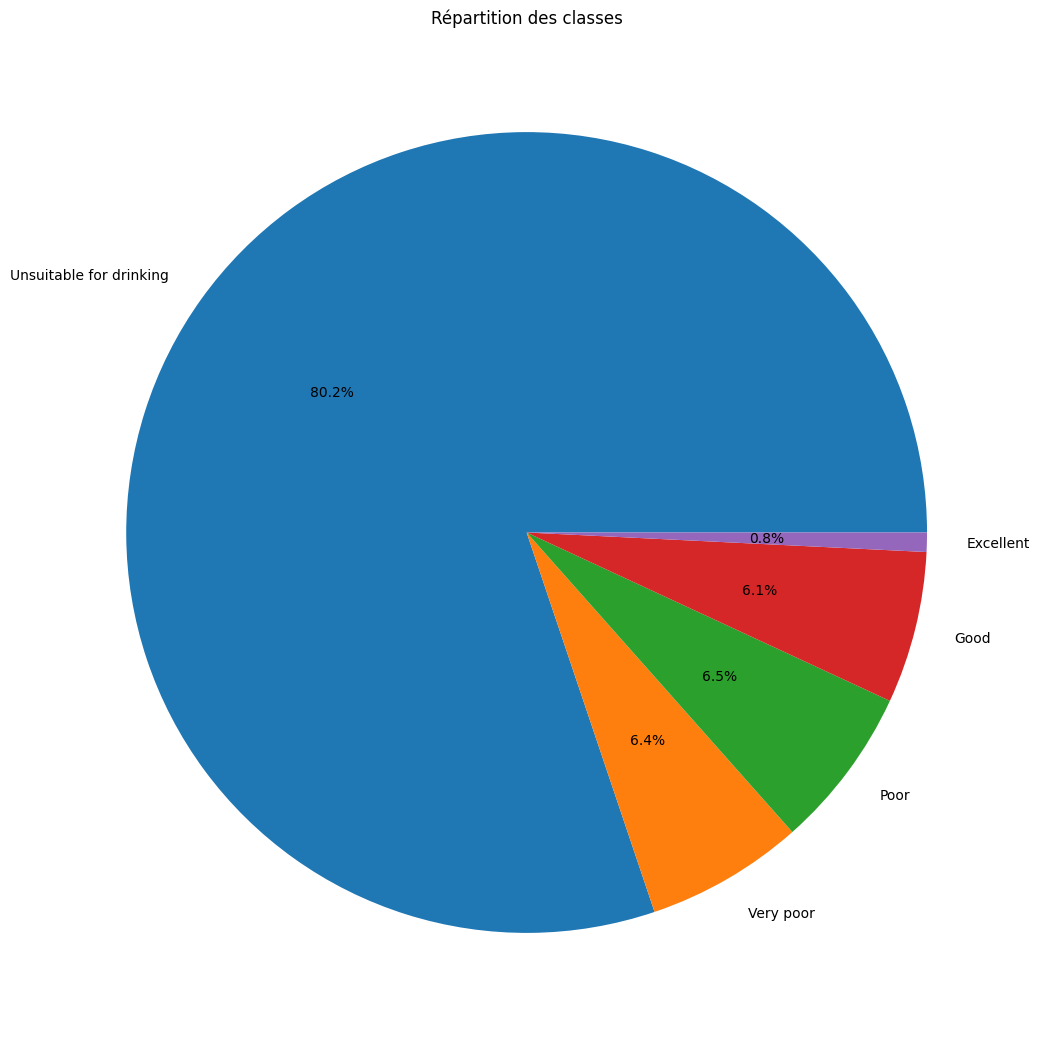

In [101]:
import matplotlib.pyplot as plt
# Définition des classes et de leurs effectifs
classes = ['Unsuitable for drinking', 'Very poor', 'Poor', 'Good', 'Excellent']
effectifs = [n_unsuitable,n_very_poor,n_poor,n_good,n_excellent]
# Création du diagramme circulaire
fig, ax = plt.subplots()
ax.pie(effectifs, labels=classes, autopct='%2.1f%%')
# Définir la taille de la figure
fig.set_size_inches(14, 13)
# Ajout d'un titre
ax.set_title('Répartition des classes')
# Affichage du diagramme
plt.show()

In [104]:
import pandas as pd
# Enregistrement en format CSV sans index
df_wqi.to_csv('Water_dataX_mean_state_hong_kong.csv', index=False)

In [105]:
df=pd.read_csv('Water_dataX_mean_state_hong_kong.csv')

In [109]:
B=set()
j=1
for i in df['ZONE']:
    B.add(i)
for k in B:
  j+=1
print(j)
print(B)

11
{'Western Buffer', 'Southern', 'DB7', 'Victoria Harbour', 'DB4', 'Tolo Harbour And Channel', 'North Western', 'Port Shelter', 'Deep Bay', 'Junk Bay'}


In [110]:
B=set()
j=1
for i in df['River']:
    B.add(i)
for k in B:
  j+=1
print(j)
print(B)

37
{'Tai Wai Nullah', 'Tung Tze Stream', 'Sam Dip Tam Stream', 'Fairview Park Nullah', 'Ha Pak Nai Stream', 'Tai Po River', 'Mui Wo River', 'Shing Mun River', 'Kwun Yam Shan Stream', 'Tin Shui Wai Nullah', 'River Beas', 'Yuen Long Creek', 'Kau Wa Keng Stream', 'Sha Kok Mei Stream', 'Tai Chung Hau Stream', 'Ho Chung River', 'Pai Min Kok Stream', 'Lam Tsuen River', 'Shan Liu Stream', 'Tseng Lan Shue Stream', 'Tung Chung River', 'Tai Po Kau Stream', 'Kam Tin River', 'Tuen Mun River', 'Ngau Hom Sha Stream', 'Siu Lek Yuen Nullah', 'Sheung Pak Nai Stream', 'Tin Sum Nullah', 'Pak Nai Stream', 'DB7', 'Tsang Kok Stream', 'River Indus', 'DB4', 'Kai Tak River', 'Tai Shui Hang Stream', 'River Ganges'}


In [112]:
B=set()
j=1
for i in df['Station']:
    B.add(i)
for k in B:
  j+=1
print(j)
print(B)

85
{'DB5', 'MW2', 'IN1', 'DB8', 'FVR1', 'TSR1', 'TR12D', 'MW1', 'TR6', 'TN1', 'YL2', 'TR12', 'TR12E', 'GR3', 'KT2', 'RB2', 'TR12I', 'PR8', 'IN2', 'TR12B', 'GR2', 'JR3', 'TSR2', 'KN3', 'TR19I', 'AN2', 'KN4', 'TR4', 'TN5', 'TN3', 'TW3', 'TR17', 'TR19C', 'TR13', 'TW2', 'TR12H', 'MW5', 'MW4', 'DB4', 'MW3', 'KT1', 'KN5', 'DB6', 'TR19', 'TR23L', 'TR12F', 'TC1', 'PR2', 'YL4', 'TC3', 'TN2', 'TC2', 'IN3', 'DB7', 'KN2', 'AN1', 'PR5', 'PR7', 'TR17L', 'TR19A', 'DB3', 'TR12C', 'TR20B', 'TW1', 'YL3', 'TR12G', 'DB1', 'KN7', 'TR14', 'RB3', 'PR6', 'RB1', 'KW3', 'KY1', 'TN6', 'DB2', 'TN4', 'JR11', 'TR23A', 'JR6', 'YL1', 'KN1', 'PR1', 'GR1'}
